# Loading libraries

In [3860]:
#Loading libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from ggplot import *
import matplotlib.pyplot as plt
from fancyimpute import KNN
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [3861]:
#Setting working directory
os.chdir('E:/Project/Employee absentism/Python')

In [3862]:
os.getcwd()

'E:\\Project\\Employee absentism\\Python'

In [3863]:
#loading dataset file
emp = pd.read_csv('E:/Project/Employee absentism/Python/employee_absenteeism.csv')

In [3864]:
df=emp.copy()

In [3865]:
emp.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3866]:
#checking the data types
emp.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

# Missing Value analysis

In [3867]:
emp.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [3868]:
#From above value we can clearly see that there are missing values. since there are missing values present we need to impute 
#these missing values.

In [3869]:
emp.shape

(740, 21)

In [3870]:
#create data frame with missing values
emp_missing_value = pd.DataFrame(emp.isnull().sum())

In [3871]:
emp_missing_value

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [3872]:
#Reset index
emp_missing_value = emp_missing_value.reset_index()

In [3873]:
emp_missing_value

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [3874]:
#Renaming the columns
emp_missing_value = emp_missing_value.rename(columns = {'index':'variables',0:'missing_percentage'})

In [3875]:
emp_missing_value

,variables,missing_percentage
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [3876]:
#calculating percentage
emp_missing_value['missing_percentage'] = (emp_missing_value['missing_percentage']/len(emp))*100

In [3877]:
emp_missing_value

,variables,missing_percentage
0,ID,0.000000
1,Reason for absence,0.405405
2,Month of absence,0.135135
3,Day of the week,0.000000
4,Seasons,0.000000
5,Transportation expense,0.945946
6,Distance from Residence to Work,0.405405
7,Service time,0.405405
8,Age,0.405405
9,Work load Average/day,1.351351


In [3878]:
emp_missing_value.to_csv('E:/Project/Employee absentism/Python/missing_value_perc.csv')

In [3879]:
#Creating missing value in Transportation expense and later imputing it.


In [3880]:
#Creating copy
df = emp.copy()

In [3881]:
df1=emp.copy()

In [3882]:
#Creating missing value
emp['Transportation expense'].iloc[10]

260.0

In [3883]:
#Imputation method
#actual value = 260
#Mean = 220.98
#Median = 225
#KNN = 259.99

In [3884]:
emp['Transportation expense'].iloc[10] = np.nan

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3885]:
emp['Transportation expense'].iloc[10]

nan

In [3886]:
#Impute with mean
emp['Transportation expense'] = emp['Transportation expense'].fillna(emp['Transportation expense'].mean())

In [3887]:
emp['Transportation expense'].iloc[10]

220.98224043715848

In [3888]:
#Loading data set again
emp = df.copy()

In [3889]:
emp['Transportation expense'].iloc[10]

260.0

In [3890]:
emp['Transportation expense'].iloc[10] = np.nan

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3891]:
emp['Transportation expense'].iloc[10]

nan

In [3892]:
#Impute with median
emp['Transportation expense'] = emp['Transportation expense'].fillna(emp['Transportation expense'].median())

In [3893]:
emp['Transportation expense'].iloc[10]

225.0

In [3894]:
##impute with KNN

In [3895]:
#Loading dataaset again
emp= df1.copy()

In [3896]:
emp['Transportation expense'].iloc[10] = np.nan

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3897]:
emp['Transportation expense'].iloc[10]

nan

In [3898]:
#Applying KNN imputation method
emp = pd.DataFrame(KNN(k = 3).fit_transform(emp), columns = emp.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.193
Imputing row 101/740 with 1 missing, elapsed time: 0.196
Imputing row 201/740 with 0 missing, elapsed time: 0.196
Imputing row 301/740 with 0 missing, elapsed time: 0.196
Imputing row 401/740 with 0 missing, elapsed time: 0.196
Imputing row 501/740 with 0 missing, elapsed time: 0.196
Imputing row 601/740 with 0 missing, elapsed time: 0.196
Imputing row 701/740 with 0 missing, elapsed time: 0.196


In [3899]:
emp['Transportation expense'].iloc[10]

259.99999650507766

In [3900]:
#As we have seen that actual value is 260 and knn has given the value of 259.99 which is nearest to the actual value where 
#we created the missing value. Hence we will go with KNN method of imputation for missing values.

In [3901]:
#Checking if any missing values
emp.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [3902]:
#We can  see that now there are no missing values present hence we can move to our next stage of pre processing.

# Outlier Analysis

In [3903]:
emp.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.000000
1,36.0,0.0,7.0,3.0,1.0,118.000000,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.000000
2,3.0,23.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.000000
3,7.0,7.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.000000
4,11.0,23.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.000000
5,3.0,23.0,7.0,6.0,1.0,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.000009
6,10.0,22.0,7.0,6.0,1.0,354.419906,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.000000
7,20.0,23.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.000000
8,14.0,19.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.000000
9,1.0,22.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.000000


In [3904]:
emp.shape

(740, 21)

In [3905]:
#Here we are storing categorical and continuous variables in different objects
variable_num = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index','Pet', 'Son', 'Absenteeism time in hours']

variable_cat = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker']

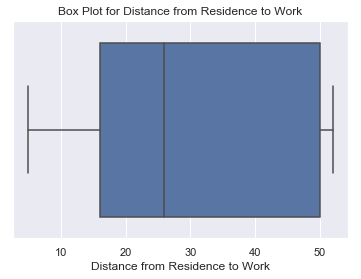

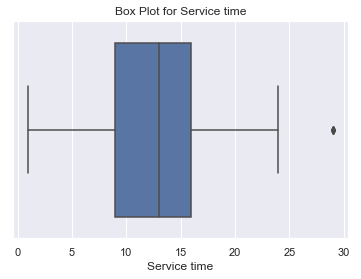

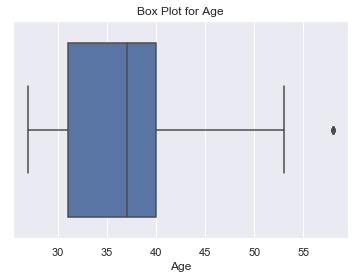

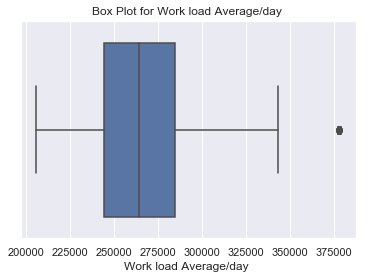

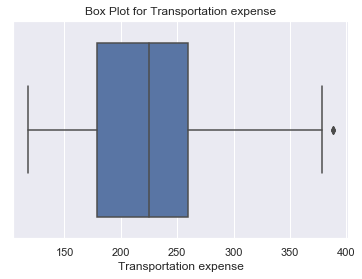

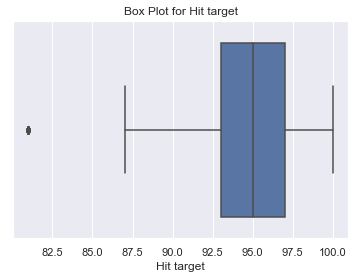

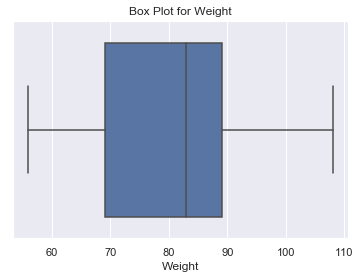

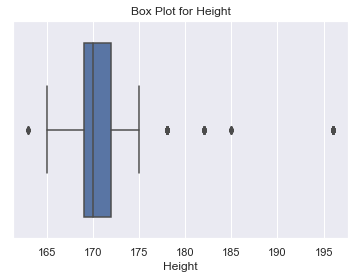

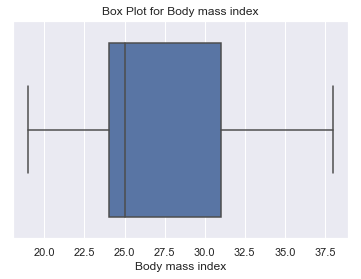

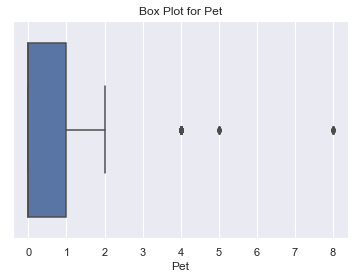

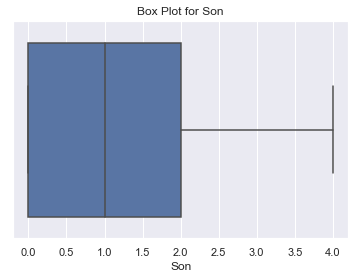

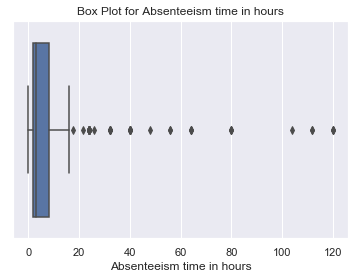

In [3906]:
#Draw box plot
for i in variable_num:
    sns.boxplot(emp[i])
    plt.title("Box Plot for "+str(i))
    plt.show()

In [3907]:
emp.shape

(740, 21)

In [3908]:
#loading the data again. the copy we have saved earlier
#emp = df.copy()

In [3909]:
emp.shape

(740, 21)

In [3910]:
# Checking if there is any missing value
emp.isnull().sum().sum()

0

In [3911]:
#detect and replace outliers with NA
#Extracting quartiles
for i in variable_num:
    q75,q25=np.percentile(emp[i],[75,25])
  



   ##calculating iqr
    iqr=q75-q25

    #calculating inner and outer fence
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)

    #replace with NA
    emp.loc[emp[i]<minimum,i] = np.nan
    emp.loc[emp[i]>maximum,i] = np.nan

In [3912]:
emp.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               31
Hit target                          19
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                 46
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours           46
dtype: int64

In [3913]:
#calculating missing values
missing_val = pd.DataFrame(emp.isnull().sum())

In [3914]:
missing_val

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,3
Distance from Residence to Work,0
Service time,5
Age,8
Work load Average/day,31


In [3915]:
#Impute with KNN
emp=pd.DataFrame(KNN(k=3).fit_transform(emp), columns = emp.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.113
Imputing row 101/740 with 1 missing, elapsed time: 0.113
Imputing row 201/740 with 1 missing, elapsed time: 0.113
Imputing row 301/740 with 0 missing, elapsed time: 0.113
Imputing row 401/740 with 0 missing, elapsed time: 0.123
Imputing row 501/740 with 0 missing, elapsed time: 0.123
Imputing row 601/740 with 0 missing, elapsed time: 0.123
Imputing row 701/740 with 0 missing, elapsed time: 0.123


In [3916]:
emp.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Finding Average monthly hours of Absenteeism

In [3917]:
hr_loss = pd.DataFrame(emp[['Month of absence','Absenteeism time in hours']])

In [3918]:
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(1, "January")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(2, "Ferbruary")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(3, "March")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(4, "April")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(5, "May")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(6, "june")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(7, "July")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(8, "August")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(9, "September")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(10, "October")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(11, "November")
hr_loss['Month of absence'] = hr_loss['Month of absence'].replace(12, "December")

In [3919]:
hr_loss.head(5)

,Month of absence,Absenteeism time in hours
0,July,4.0
1,July,0.0
2,July,2.0
3,July,4.0
4,July,2.0


In [3920]:
hr_loss.groupby('Month of absence')['Absenteeism time in hours'].mean()

Month of absence
0.0                  0.000000
10.00000040690432    3.000000
April                4.484123
August               4.649133
December             3.999068
Ferbruary            3.849183
January              3.491295
July                 5.613350
March                5.259064
May                  4.162869
November             4.134807
October              4.242845
September            3.836394
june                 4.551624
Name: Absenteeism time in hours, dtype: float64

In [3921]:
hr_loss.isnull().sum()

Month of absence             0
Absenteeism time in hours    0
dtype: int64

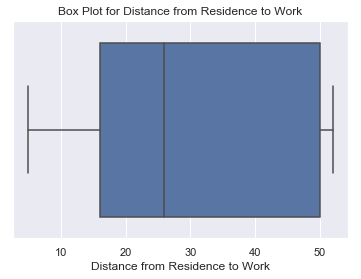

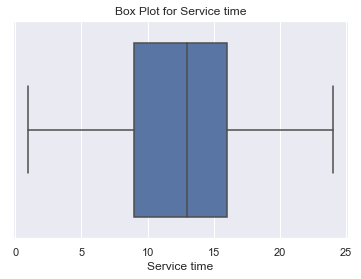

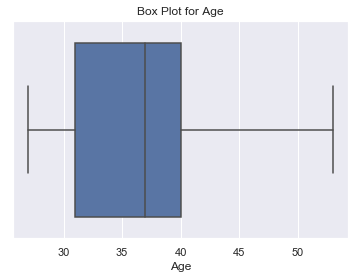

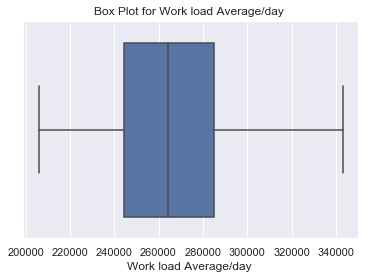

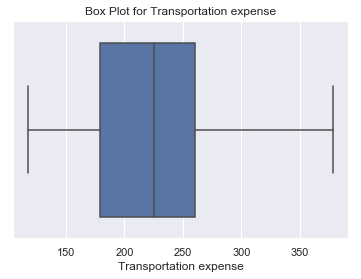

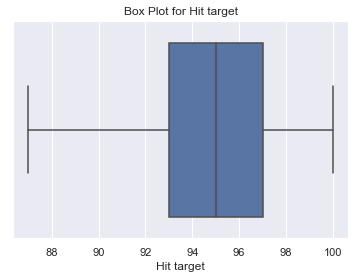

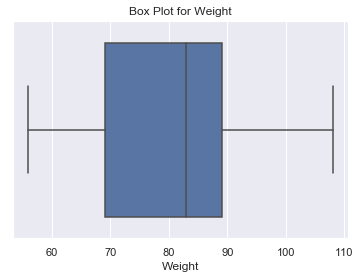

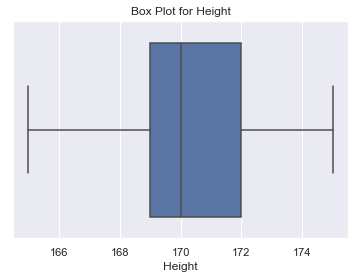

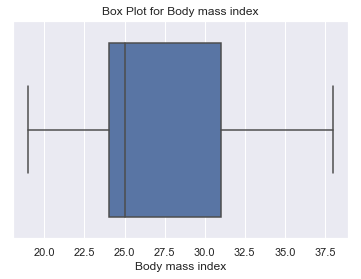

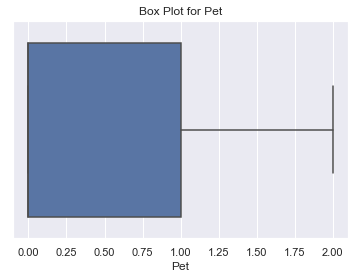

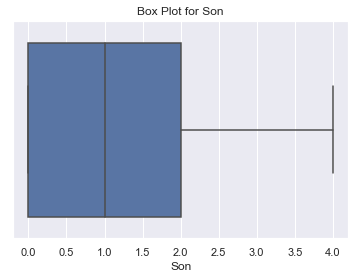

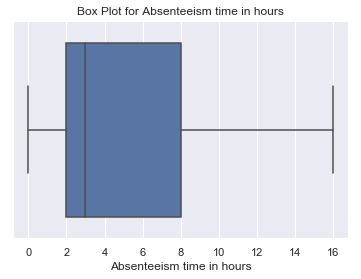

In [3922]:
#Draw box plot
for i in variable_num:
    sns.boxplot(emp[i])
    plt.title("Box Plot for "+str(i))
    plt.show()

# Feature Selection

In [3923]:
br_corr = emp.loc[:,variable_num]

C:\Users\Aditya\Anaconda3\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\Aditya\Anaconda3\lib\site-packages\seaborn\palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


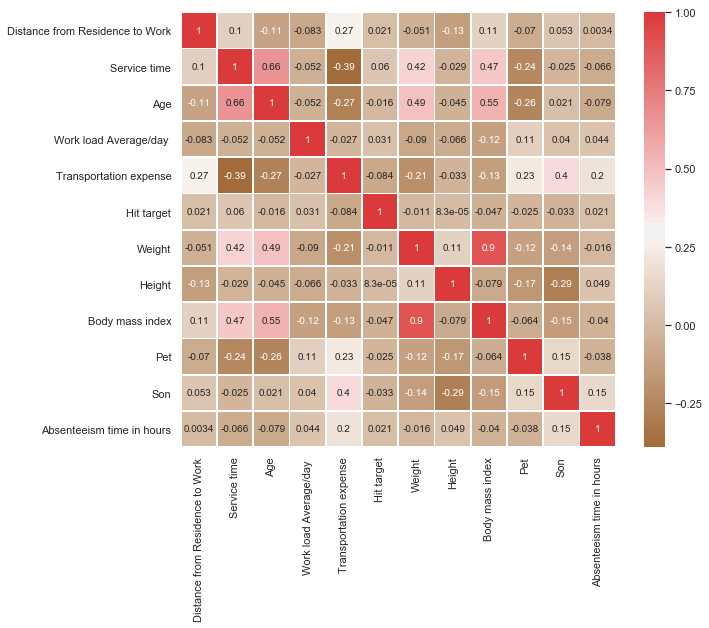

In [3924]:
f, ax = plt.subplots(figsize=(10,8))

corr_matrix = br_corr.corr()

sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype=np.bool), cmap = sns.diverging_palette(400,12, as_cmap= True),
            annot = True , linewidths = 0.9,square = True, ax=ax)

In [3925]:
#loop for Anova as we have categorical and continous varibale 
for i in variable_cat:
    f, p = stats.f_oneway(emp[i], emp["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 1.7785014075344148e-172
P value for variable Reason for absence is 3.6736405592138233e-274
P value for variable Month of absence is 8.947828064387552e-27
P value for variable Day of the week is 0.0004917677652965601
P value for variable Seasons is 3.2732455306427215e-42
P value for variable Disciplinary failure is 9.750833449882069e-194
P value for variable Education is 1.3331381651935513e-110
P value for variable Social drinker is 1.13501319297773e-157
P value for variable Social smoker is 3.550465245382907e-192


In [3926]:
list(emp)

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [3927]:
#here we are dropping redundant variable.## Here we are dropping continous variable who have high correlation.
emp_reduced = emp.drop(['Weight','Age'],axis=1)

In [3928]:
emp_reduced.shape

(740, 19)

In [3929]:
emp_reduced.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,170.000009,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.000000,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,168.000000,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.0,2.0


C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


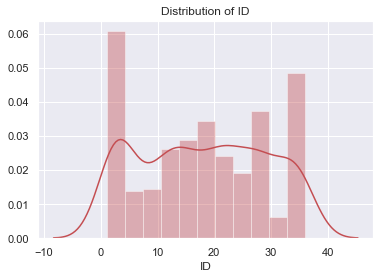

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


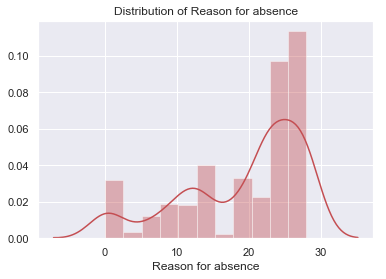

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


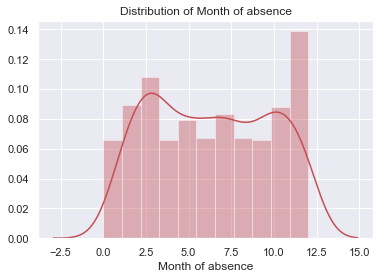

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


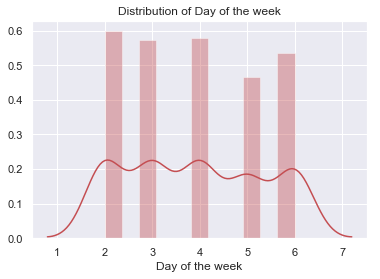

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


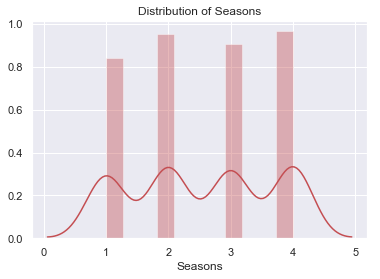

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


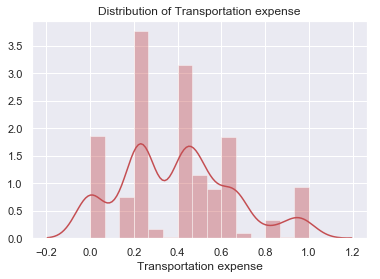

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


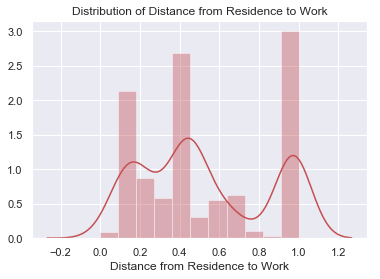

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


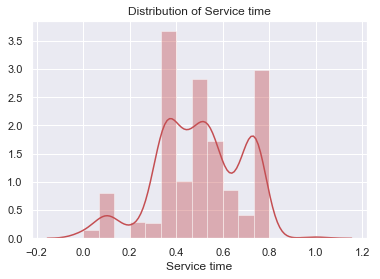

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


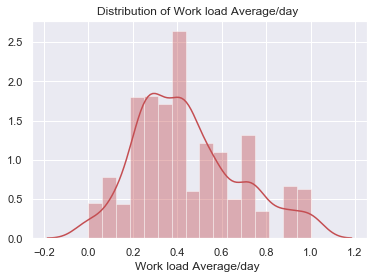

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


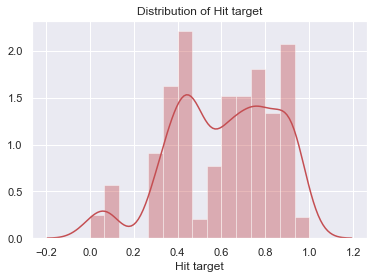

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


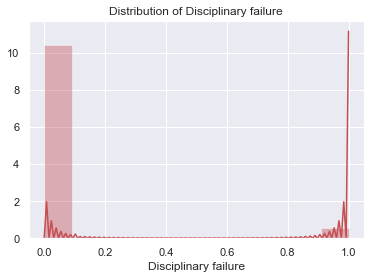

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


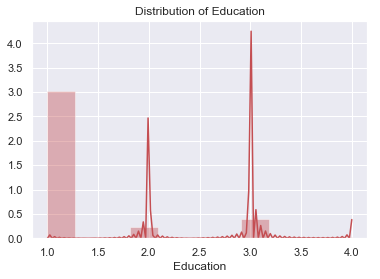

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


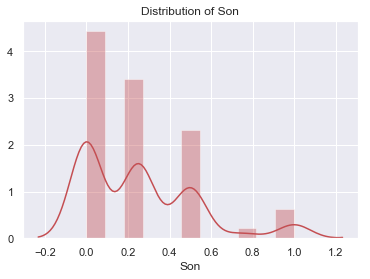

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


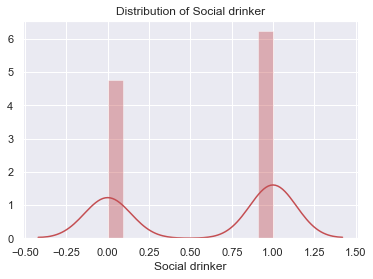

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


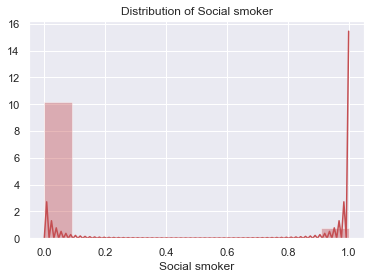

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


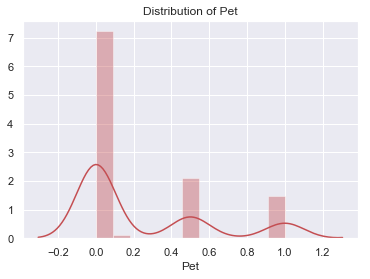

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


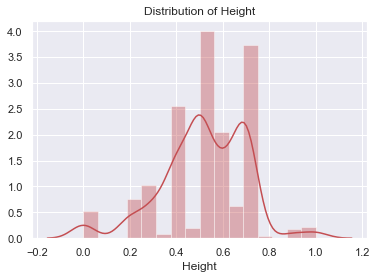

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


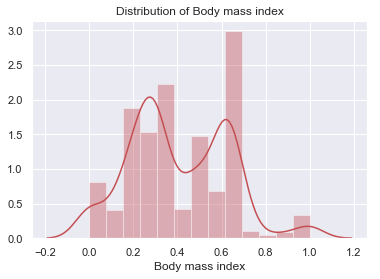

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


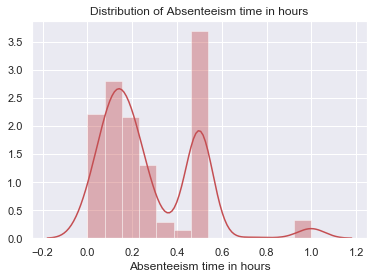

In [3560]:
#Checking distribution of data
sns.set()
for i in emp_reduced:
    sns.distplot(emp_reduced[i],bins = 'auto', color = 'r')
    plt.title("Distribution of "+str(i))
    plt.show()


In [3516]:
#Since we have dropped few variables and stored in emp_reduced. So here we have to updated the variable
#and store them in new object.
variable_num_update = ['Distance from Residence to Work','Pet','Son',
                        'Work load Average/day ', 'Transportation expense',
                        'Hit target', 'Height','Service time', 
                        'Body mass index', 'Absenteeism time in hours']

variable_cat_update = ['ID','Reason for absence','Disciplinary failure','Social drinker','Day of the week','Education',
                       'Month of absence','Social smoker','Seasons']


In [3562]:
#Since data is not normally distributed hence we will normalize our data for further analysis
for i in variable_num_update:
    print(i)
    emp_reduced[i] = (emp_reduced[i] - emp_reduced[i].min())/(emp_reduced[i].max()-emp_reduced[i].min())

Distance from Residence to Work
Pet
Son
Work load Average/day 
Transportation expense
Hit target
Height
Service time
Body mass index
Absenteeism time in hours


C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


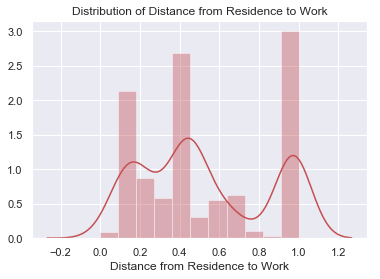

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


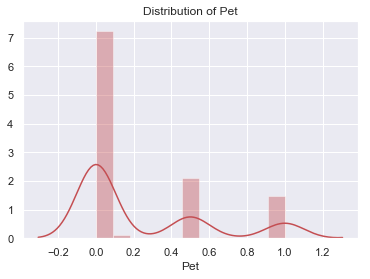

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


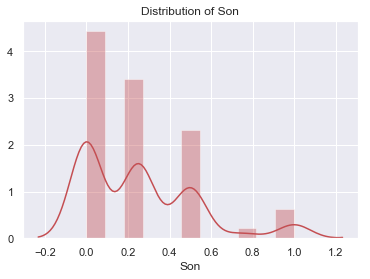

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


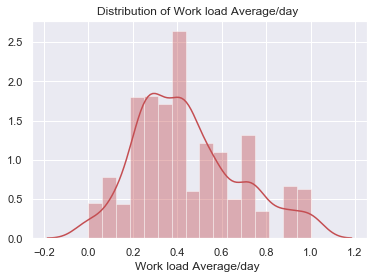

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


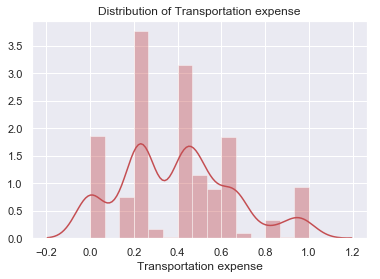

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


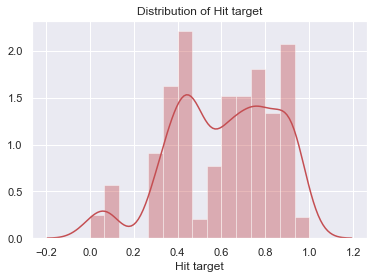

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


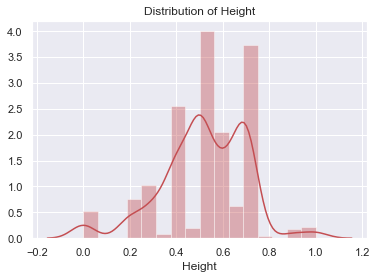

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


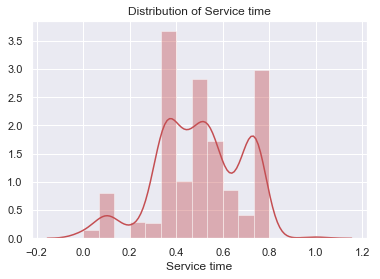

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


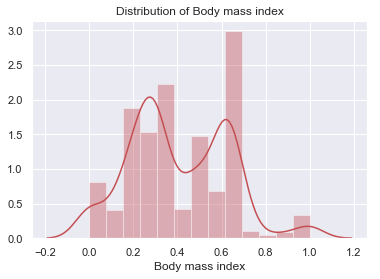

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


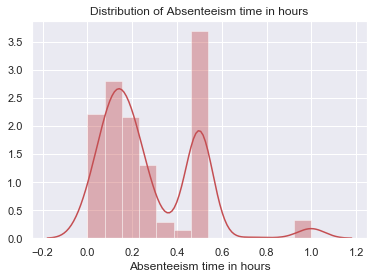

In [3564]:
#Checking distribution of data
sns.set()
for i in variable_num_update:
    sns.distplot(emp_reduced[i],bins = 'auto', color = 'r')
    plt.title("Distribution of "+str(i))
    plt.show()

In [3519]:
emp_reduced.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,0.657692,0.659574,0.521739,0.244925,0.769231,0.0,1.0,0.50,1.0,0.0,0.500000,0.700000,0.578947,0.250000
1,36.0,0.0,7.0,3.0,1.0,0.000000,0.170213,0.739130,0.244925,0.769231,1.0,1.0,0.25,1.0,0.0,0.000000,0.500001,0.631579,0.000000
2,3.0,23.0,7.0,4.0,1.0,0.234615,0.978723,0.739130,0.244925,0.769231,0.0,1.0,0.00,1.0,0.0,0.000000,0.500000,0.631579,0.125000
3,7.0,7.0,7.0,5.0,1.0,0.619231,0.000000,0.565217,0.244925,0.769231,0.0,1.0,0.50,1.0,1.0,0.000000,0.300000,0.263158,0.250000
4,11.0,23.0,7.0,5.0,1.0,0.657692,0.659574,0.521739,0.244925,0.769231,0.0,1.0,0.50,1.0,0.0,0.500000,0.700000,0.578947,0.125000
5,3.0,23.0,7.0,6.0,1.0,0.234615,0.978723,0.739130,0.244925,0.769231,0.0,1.0,0.00,1.0,0.0,0.000000,0.500000,0.631579,0.125001
6,10.0,22.0,7.0,6.0,1.0,0.909307,1.000000,0.086957,0.244925,0.769231,0.0,1.0,0.25,1.0,0.0,0.122672,0.700000,0.421053,0.500000
7,20.0,23.0,7.0,6.0,1.0,0.546154,0.957447,0.434783,0.244925,0.769231,0.0,1.0,1.00,1.0,0.0,0.000000,0.300000,0.210526,0.250000
8,14.0,19.0,7.0,2.0,1.0,0.142308,0.148936,0.565217,0.244925,0.769231,0.0,1.0,0.50,1.0,0.0,0.000000,0.397875,0.315789,0.196121
9,1.0,22.0,7.0,2.0,1.0,0.450000,0.127660,0.565217,0.244925,0.769231,0.0,3.0,0.25,0.0,0.0,0.500000,0.700000,0.526316,0.500000


In [3626]:
emp_reduced['Month of absence'].isnull().sum()

0

# Creating Dummies

In [3520]:
#Save target variable first
emp_dummy = pd.DataFrame(emp_reduced['Absenteeism time in hours'])

In [3521]:
emp_dummy.shape

(740, 1)

In [3522]:
#here in variable_num_update1 we have not added 'Absenteeism time in hours' as we have already added in data frame and adding it
#again will lead to overlap error.
variable_num_update1 = ['Distance from Residence to Work','Pet','Son',
                        'Work load Average/day ', 'Transportation expense',
                        'Hit target', 'Height','Service time', 
                        'Body mass index']

In [3523]:
variable_cat_update1 = ['ID','Reason for absence','Disciplinary failure','Social drinker','Day of the week','Education',
                       'Social smoker','Month of absence','Seasons',]

In [3524]:
emp_dummy.head(2)

,Absenteeism time in hours
0,0.25
1,0.00


In [3525]:
#Add continous variables
emp_dummy = emp_dummy.join(emp_reduced[variable_num_update1])

In [3526]:
emp_dummy.shape

(740, 10)

In [3527]:
##Create dummies for categorical variables. Above we have already stored categorical variable in variable_cat

for i in variable_cat_update1:
    temp = pd.get_dummies(emp_reduced[i], prefix = i)
    emp_dummy = emp_dummy.join(temp)

In [3528]:
emp_dummy.head(5)

,Absenteeism time in hours,Distance from Residence to Work,Pet,Son,Work load Average/day,Transportation expense,Hit target,Height,Service time,Body mass index,...,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_10.00000040690432,Month of absence_11.0,Month of absence_12.0,Seasons_1.0,Seasons_2.0,Seasons_3.0,Seasons_4.0
0,0.250,0.659574,0.5,0.50,0.244925,0.657692,0.769231,0.700000,0.521739,0.578947,...,0,0,0,0,0,0,1,0,0,0
1,0.000,0.170213,0.0,0.25,0.244925,0.000000,0.769231,0.500001,0.739130,0.631579,...,0,0,0,0,0,0,1,0,0,0
2,0.125,0.978723,0.0,0.00,0.244925,0.234615,0.769231,0.500000,0.739130,0.631579,...,0,0,0,0,0,0,1,0,0,0
3,0.250,0.000000,0.0,0.50,0.244925,0.619231,0.769231,0.300000,0.565217,0.263158,...,0,0,0,0,0,0,1,0,0,0
4,0.125,0.659574,0.5,0.50,0.244925,0.657692,0.769231,0.700000,0.521739,0.578947,...,0,0,0,0,0,0,1,0,0,0


In [3529]:
emp_dummy.shape

(740, 118)

In [3530]:
emp_dummy.head(2)

,Absenteeism time in hours,Distance from Residence to Work,Pet,Son,Work load Average/day,Transportation expense,Hit target,Height,Service time,Body mass index,...,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_10.00000040690432,Month of absence_11.0,Month of absence_12.0,Seasons_1.0,Seasons_2.0,Seasons_3.0,Seasons_4.0
0,0.25,0.659574,0.5,0.50,0.244925,0.657692,0.769231,0.700000,0.521739,0.578947,...,0,0,0,0,0,0,1,0,0,0
1,0.00,0.170213,0.0,0.25,0.244925,0.000000,0.769231,0.500001,0.739130,0.631579,...,0,0,0,0,0,0,1,0,0,0


# Dividing data into train and test

In [3184]:
# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,emp_dummy, test_size=0.2)

# Decision Tree

In [3010]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 5).fit(X_train,y_train)

In [3011]:
# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [3012]:
# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [3013]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.16453802703408338
Root Mean Squared Error For Test data = 0.1754563740288236
R^2 Score(coefficient of determination) = 0.2101739150543113


# Random Forest

In [3099]:
#Random Forest
RF_model = RandomForestRegressor(n_estimators = 500, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", 
                                  min_samples_leaf = 50).fit(X_train, y_train)


In [3100]:
# Calculating RMSE for training data to check for over fitting
pred_train = RF_model.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [3101]:
# Calculating RMSE for test data to check accuracy
pred_test = RF_model.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [3102]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.1917232880631965
Root Mean Squared Error For Test data = 0.19499195318494775
R^2 Score(coefficient of determination) = 0.10750282914995798


# Linear Regression

In [3189]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [3190]:
# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [3191]:
# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [3192]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.013022927000721968
Root Mean Squared Error For Test data = 28891.076441671376
R^2 Score(coefficient of determination) = -17444084547.83734


# Dimensionality reduction using PCA

In [3531]:
# Dimensionality reduction by using pca
emp1 = emp_dummy['Absenteeism time in hours']

In [3532]:
#emp_dummy.drop(['Absenteeism time in hours'], inplace = True, axis=1)
emp_dummy.shape

(740, 118)

In [3533]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = emp_dummy.values

In [3534]:
# Data has 118 variables so no of components of PCA = 118
pca = PCA(n_components=118)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=118, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [3535]:
# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

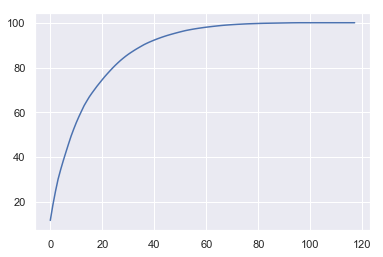

In [3536]:
# Cumulative Variance explains
sns.set()
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

In [3537]:
# From the above plot selecting 50 components since it explains almost 95+ % data variance
pca = PCA(n_components=50)



# Fitting the selected components to the data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Dividing data into train 

In [3538]:
# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,emp1, test_size=0.2)

# Decision Tree

In [3283]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 5).fit(X_train,y_train)

In [3284]:
# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [3285]:
# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [3286]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0014547258030807727
Root Mean Squared Error For Test data = 0.009282941496556348
R^2 Score(coefficient of determination) = 0.9984520572905576


# Random Forest

In [3376]:
#Random Forest
RF_model = RandomForestRegressor(n_estimators = 500, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", 
                                  min_samples_leaf = 50).fit(X_train, y_train)


In [3377]:
# Calculating RMSE for training data to check for over fitting
pred_train = RF_model.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [3378]:
# Calculating RMSE for test data to check accuracy
pred_test = RF_model.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [3379]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.08463919371751547
Root Mean Squared Error For Test data = 0.07135560349067667
R^2 Score(coefficient of determination) = 0.8598614268421698


# Linear Regression

In [3539]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [3540]:
# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [3541]:
# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [3542]:
print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 4.529890363154557e-16
Root Mean Squared Error For Test data = 0.00030505994938045586
R^2 Score(coefficient of determination) = 0.9999979137208953


In [ ]:
#After applying PCA and doing dimesion reduction we can clearly see that Linear regression performs better as compared to
#Random forest and decision tree. So we will go for linear regression model.

# Plotting graphs 

In [3543]:
emp.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [3544]:
emp.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.000000,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,170.000009,31.0,0.0


In [3545]:
emp=df.copy()

In [3546]:
emp['Day of the week'] = emp['Day of the week'].replace(2, "monday")
emp['Day of the week'] = emp['Day of the week'].replace(3, "Tuesday")
emp['Day of the week'] = emp['Day of the week'].replace(4, "Wednesday")
emp['Day of the week'] = emp['Day of the week'].replace(5, "Thursday")
emp['Day of the week'] = emp['Day of the week'].replace(6, "Friday")

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

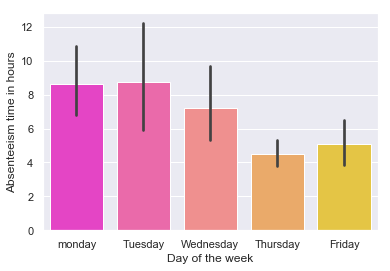

In [3547]:
sns.barplot(x='Day of the week', y='Absenteeism time in hours', palette = 'spring', data = emp, order  =['monday','Tuesday',
                                                                                                        'Wednesday','Thursday','Friday'])

In [3548]:
emp['Seasons'] = emp['Seasons'].replace(1, "Summer")
emp['Seasons'] = emp['Seasons'].replace(2, "Autumnn")
emp['Seasons'] = emp['Seasons'].replace(3, "Winter")
emp['Seasons'] = emp['Seasons'].replace(4, "Spring")

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

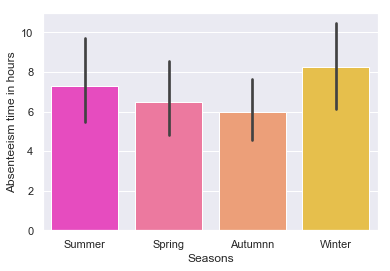

In [3549]:
sns.barplot(x='Seasons', y='Absenteeism time in hours', palette = 'spring',  data = emp)

In [3550]:
emp['Disciplinary failure'] = emp['Disciplinary failure'].replace(0, "No")
emp['Disciplinary failure'] = emp['Disciplinary failure'].replace(1, "Yes")

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

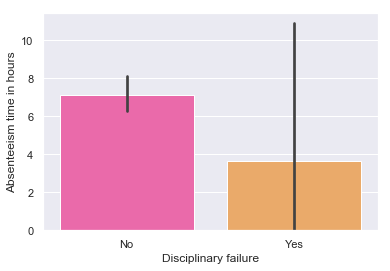

In [3551]:
sns.barplot(x='Disciplinary failure', y='Absenteeism time in hours', palette = 'spring',  data = emp)

In [3552]:
emp['Education'] = emp['Education'].replace(1, "High School")
emp['Education'] = emp['Education'].replace(2, "Graduate")
emp['Education'] = emp['Education'].replace(3, "Post Graduate")
emp['Education'] = emp['Education'].replace(4, "Master and Doctor")

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

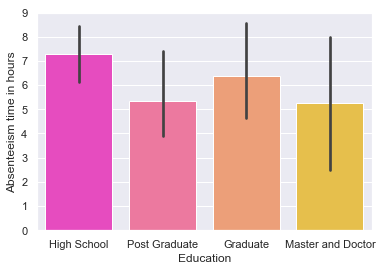

In [3553]:
sns.barplot(x='Education', y='Absenteeism time in hours', palette = 'spring',  data = emp)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

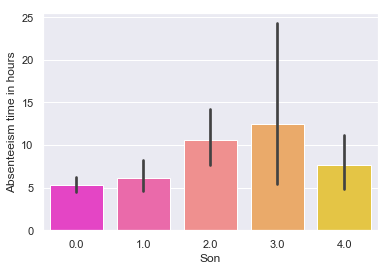

In [3554]:
sns.barplot(x='Son', y='Absenteeism time in hours', palette = 'spring',  data = emp)

In [3555]:
emp['Social drinker'] = emp['Social drinker'].replace(0, "No")
emp['Social drinker'] = emp['Social drinker'].replace(1, "Yes")

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

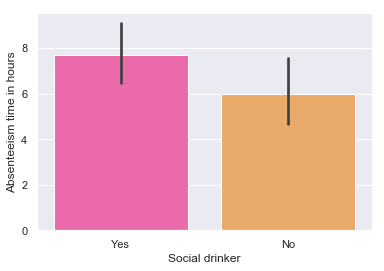

In [3556]:
sns.barplot(x='Social drinker', y='Absenteeism time in hours', palette = 'spring',  data = emp)

In [3557]:
emp['Social smoker'] = emp['Social smoker'].replace(0, "No")
emp['Social smoker'] = emp['Social smoker'].replace(1, "Yes")

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

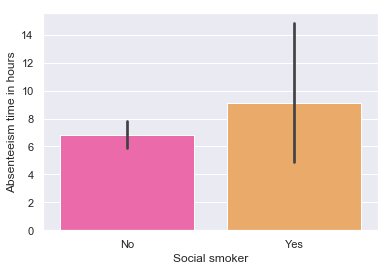

In [3558]:
sns.barplot(x='Social smoker', y='Absenteeism time in hours', palette = 'spring',  data = emp)